<font size=20>Q1</font>  - Intensity Transformation

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



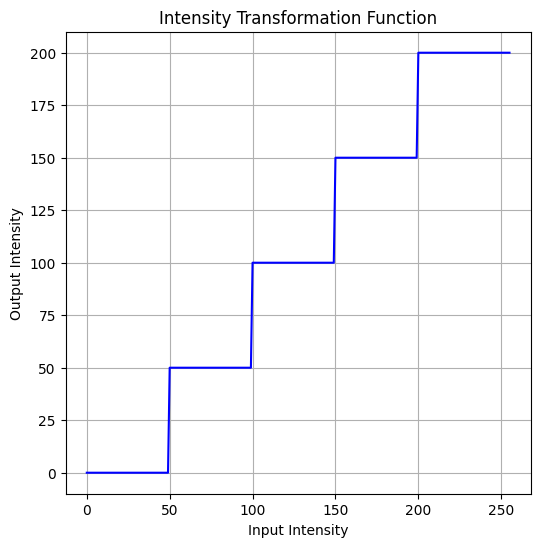

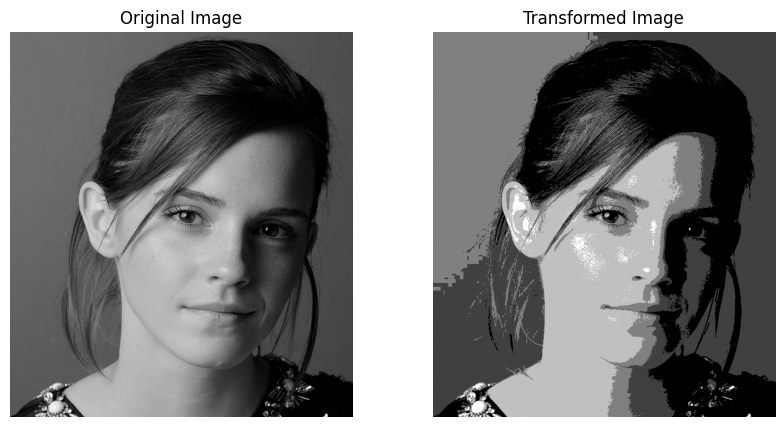

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img1 = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "Image not found."

# Define intensity transformation
def intensity_transform(img):
    table = np.array([
        0   if i < 50 else
        50  if i < 100 else
        100 if i < 150 else
        150 if i < 200 else
        200
        for i in range(256)
    ], dtype=np.uint8)
    return cv.LUT(img, table)

# Apply transformation
img1_transformed = intensity_transform(img1)

# Plot transformation curve
plt.figure(figsize=(6,6))
plt.plot(range(256), [intensity_transform(np.array([[i]], dtype=np.uint8))[0,0] for i in range(256)], 'b-')
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.show()

# Show images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img1_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.show()


Q2

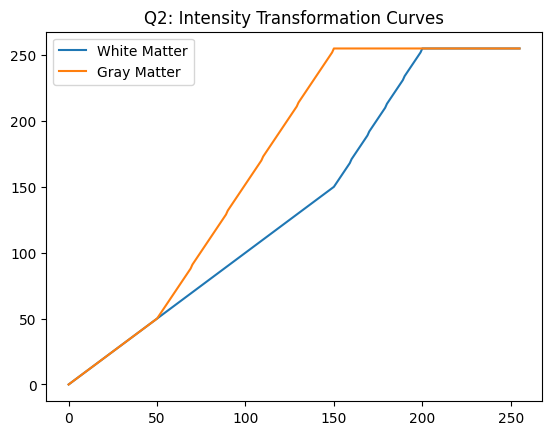

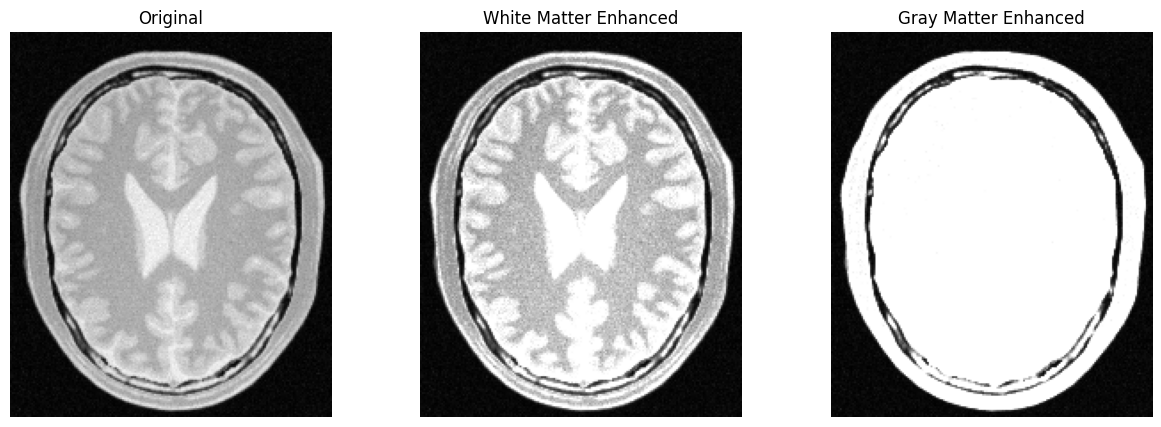

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
img2 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img2 is not None, "Image not found."

def intensity_transform_piecewise(img, xp, fp):
    lut = np.interp(np.arange(256), xp, fp).astype(np.uint8)
    return cv.LUT(img, lut), lut

# (a) White matter: boost high intensities
xp_white = [0, 150, 200, 255]
fp_white = [0, 150, 255, 255]
white_img, lut_white = intensity_transform_piecewise(img2, xp_white, fp_white)

# (b) Gray matter: boost mid-range intensities
xp_gray = [0, 50, 150, 255]
fp_gray = [0, 50, 255, 255]
gray_img, lut_gray = intensity_transform_piecewise(img2, xp_gray, fp_gray)

# Show transformation curves
plt.plot(lut_white, label="White Matter")
plt.plot(lut_gray, label="Gray Matter")
plt.legend(); plt.title("Q2: Intensity Transformation Curves")
plt.show()

# Show results
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img2, cmap='gray'); axs[0].set_title("Original")
axs[1].imshow(white_img, cmap='gray'); axs[1].set_title("White Matter Enhanced")
axs[2].imshow(gray_img, cmap='gray'); axs[2].set_title("Gray Matter Enhanced")
for ax in axs: ax.axis('off')
plt.show()


Q3

C:\Users\RAVINDU MALSHAN\AppData\Local\Temp\ipykernel_18644\949661998.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(L.ravel(), 256, [0,256], alpha=0.5, label='Original L')
C:\Users\RAVINDU MALSHAN\AppData\Local\Temp\ipykernel_18644\949661998.py:14: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(L_corrected.ravel(), 256, [0,256], alpha=0.5, label='Gamma Corrected L')


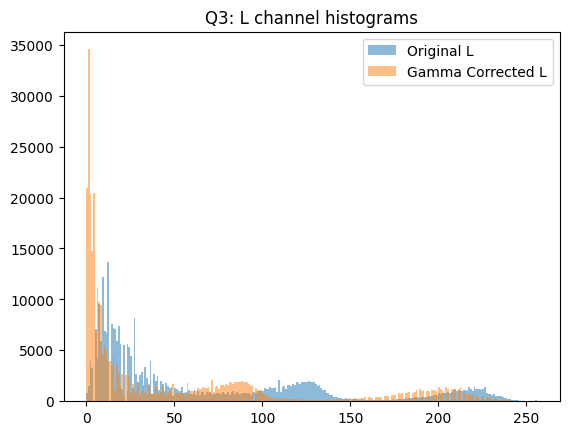

In [6]:
img3 = cv.imread('highlights_and_shadows.jpg')
lab = cv.cvtColor(img3, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

gamma = 1.5  # example, can adjust
L_float = L / 255.0
L_corrected = np.power(L_float, gamma) * 255
L_corrected = np.uint8(np.clip(L_corrected, 0, 255))

lab_corrected = cv.merge((L_corrected, a, b))
img3_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)

plt.hist(L.ravel(), 256, [0,256], alpha=0.5, label='Original L')
plt.hist(L_corrected.ravel(), 256, [0,256], alpha=0.5, label='Gamma Corrected L')
plt.legend(); plt.title("Q3: L channel histograms")
plt.show()




Q4(a)


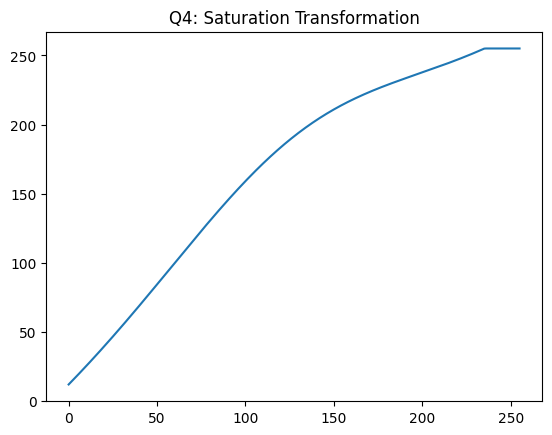

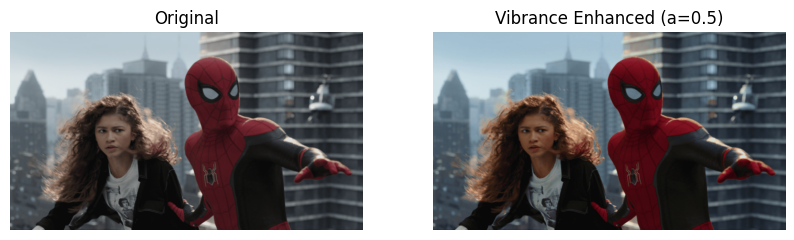

In [7]:
img4 = cv.imread('spider.png')
hsv = cv.cvtColor(img4, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

a_val = 0.5
sigma = 70
x = np.arange(256)
s_transform = np.minimum(x + a_val * 128 * np.exp(-((x-128)**2)/(2*sigma**2)), 255)
s_enhanced = cv.LUT(s, np.uint8(s_transform))

hsv_enhanced = cv.merge((h, s_enhanced, v))
img4_enhanced = cv.cvtColor(hsv_enhanced, cv.COLOR_HSV2BGR)

plt.plot(x, s_transform)
plt.title("Q4: Saturation Transformation")
plt.show()

show_images([img4, img4_enhanced], ["Original", f"Vibrance Enhanced (a={a_val})"])


Q5


C:\Users\RAVINDU MALSHAN\AppData\Local\Temp\ipykernel_18644\2415295409.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img5.ravel(), 256, [0,256], label='Original')
C:\Users\RAVINDU MALSHAN\AppData\Local\Temp\ipykernel_18644\2415295409.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img5_eq.ravel(), 256, [0,256], label='Equalized')


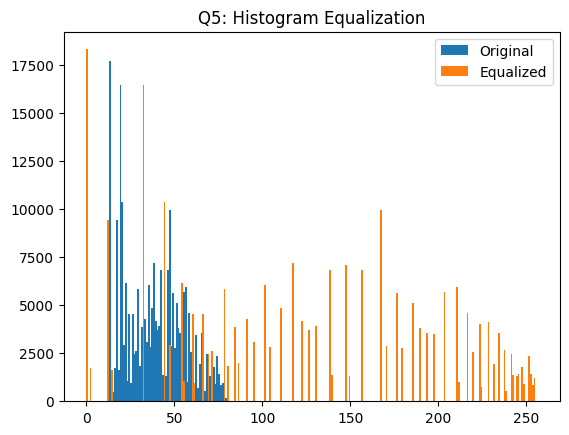

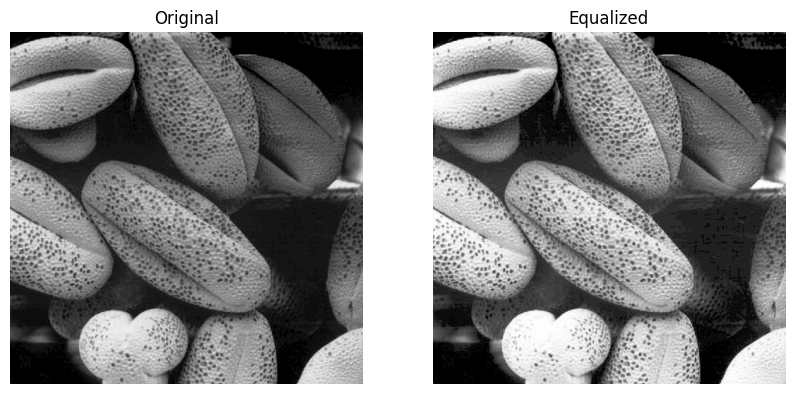

In [8]:
def hist_equalize_gray(img):
    hist, _ = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_masked = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_masked, 0).astype('uint8')
    return cv.LUT(img, cdf_final)

img5 = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)
img5_eq = hist_equalize_gray(img5)

plt.hist(img5.ravel(), 256, [0,256], label='Original')
plt.hist(img5_eq.ravel(), 256, [0,256], label='Equalized')
plt.legend(); plt.title("Q5: Histogram Equalization")
plt.show()

show_images([img5, img5_eq], ["Original", "Equalized"], ["gray", "gray"])


Q6

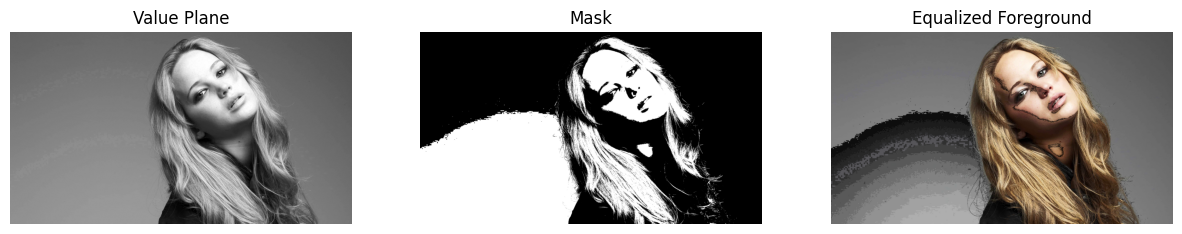

In [9]:
img6 = cv.imread('jeniffer.jpg')
hsv6 = cv.cvtColor(img6, cv.COLOR_BGR2HSV)
h6, s6, v6 = cv.split(hsv6)

_, mask = cv.threshold(v6, 128, 255, cv.THRESH_BINARY)

foreground = cv.bitwise_and(v6, v6, mask=mask)
foreground_eq = hist_equalize_gray(foreground)

background = cv.bitwise_and(v6, v6, mask=cv.bitwise_not(mask))
combined_v = cv.add(background, foreground_eq)

final_img6 = cv.cvtColor(cv.merge((h6, s6, combined_v)), cv.COLOR_HSV2BGR)

show_images([v6, mask, final_img6], ["Value Plane", "Mask", "Equalized Foreground"], ["gray", "gray", None])


Q7

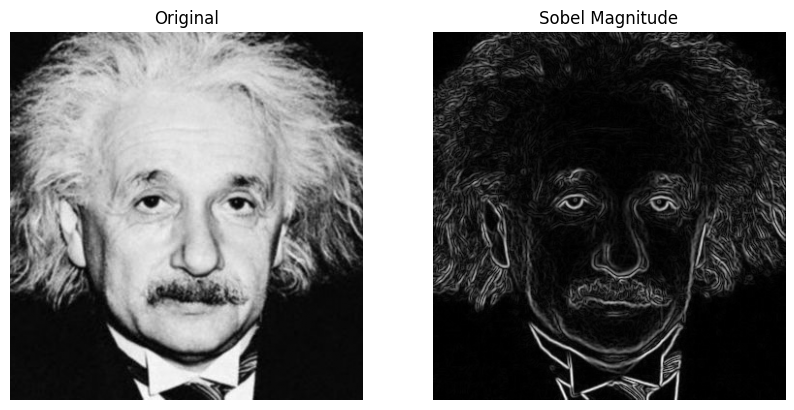

In [10]:
img7 = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype=np.float32)
sobel_y = sobel_x.T
grad_x = cv.filter2D(img7, cv.CV_64F, sobel_x)
grad_y = cv.filter2D(img7, cv.CV_64F, sobel_y)
magnitude = cv.magnitude(grad_x, grad_y)

show_images([img7, magnitude], ["Original", "Sobel Magnitude"], ["gray", "gray"])


Q8

In [ ]:
def zoom_image(img, scale, method="nearest"):
    if method == "nearest":
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)
    elif method == "bilinear":
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)

img8_small = cv.imread("Image_8_small.jpg")
img8_large = cv.imread("Image_8.jpg")
zoomed_nn = zoom_image(img8_small, 4, "nearest")
zoomed_bl = zoom_image(img8_small, 4, "bilinear")

ssd_nn = np.sum((zoomed_nn.astype(np.float32) - img8_large.astype(np.float32))**2) / np.sum(img8_large.astype(np.float32)**2)
ssd_bl = np.sum((zoomed_bl.astype(np.float32) - img8_large.astype(np.float32))**2) / np.sum(img8_large.astype(np.float32)**2)

print(f"SSD (Nearest): {ssd_nn:.4f}, SSD (Bilinear): {ssd_bl:.4f}")
show_images([zoomed_nn, zoomed_bl], ["Nearest Neighbor", "Bilinear"])


Q9

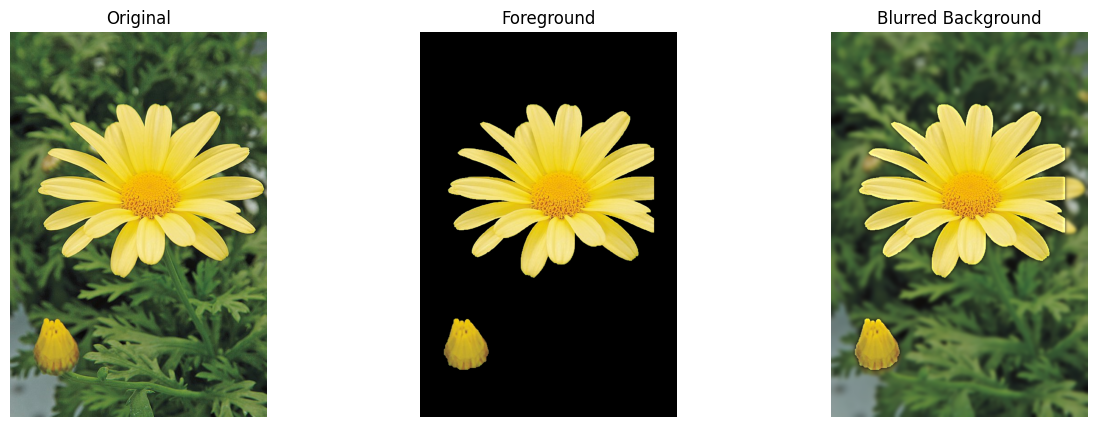

In [11]:
img9 = cv.imread("daisy.jpg")
mask = np.zeros(img9.shape[:2], np.uint8)
rect = (50, 50, img9.shape[1]-100, img9.shape[0]-100)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
cv.grabCut(img9, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
fg = img9 * mask2[:, :, np.newaxis]
bg = img9 * (1-mask2[:, :, np.newaxis])
bg_blurred = cv.GaussianBlur(bg, (21,21), 0)
enhanced_img = cv.add(fg, bg_blurred)

show_images([img9, fg, enhanced_img], ["Original", "Foreground", "Blurred Background"])
